###             LOAN STATUS PREDICTION

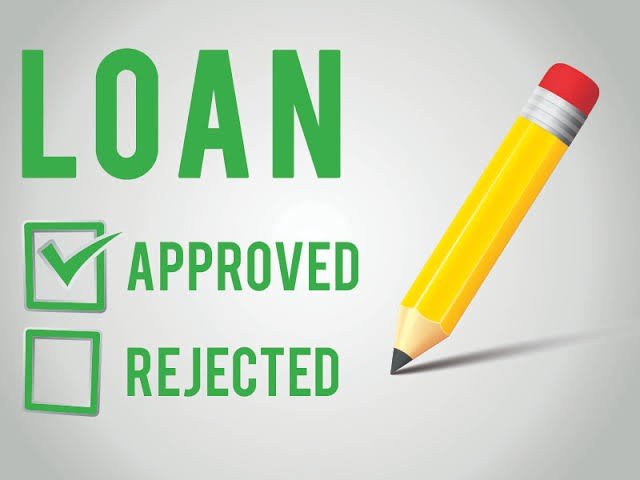

### DESCRIPTION OF THE PROJECT

It is a classification problem , given information about the application we have to predict whether the they’ll be to pay the loan or not.
The Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. 
These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers


In [8]:
import pandas as pd
dataset=pd.read_csv("C:/Users/Harshini/Downloads/Loan Prediction.csv")
df=pd.DataFrame(dataset)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,2,Graduate,No,5849,1379.0,431,153,0,Urban,Y
1,LP001003,Male,Yes,3,Graduate,No,4583,1508.0,128,360,1,Rural,N
2,LP001005,Male,Yes,2,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
4,LP001008,Male,No,2,Graduate,No,6000,0.0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,2,Graduate,No,2900,0.0,71,360,1,Rural,Y
610,LP002979,Male,Yes,0,Graduate,No,4106,0.0,40,180,1,Rural,Y
611,LP002983,Male,Yes,0,Graduate,No,8072,240.0,253,360,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187,360,1,Urban,Y


In [9]:
from warnings import filterwarnings
filterwarnings("ignore")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 62.5+ KB


In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.454397,5403.459283,1623.491726,147.239414,339.016287,0.817590
std,1.089939,6109.041673,2925.531126,87.060346,68.106311,0.386497
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,1.000000,3812.500000,1211.500000,128.000000,360.000000,1.000000
75%,2.000000,5795.000000,2297.250000,167.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [14]:
df.shape

(614, 13)

### CHECKING NULL VALUES

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### CHECKING DUPLICATES

In [16]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [17]:
df.duplicated().sum()

0

### PRINTING THE FIRST FIVE ROWS

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,2,Graduate,No,5849,1379.0,431,153,0,Urban,Y
1,LP001003,Male,Yes,3,Graduate,No,4583,1508.0,128,360,1,Rural,N
2,LP001005,Male,Yes,2,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
4,LP001008,Male,No,2,Graduate,No,6000,0.0,141,360,1,Urban,Y


### PRINTING THE LAST FIVE ROWS

In [19]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,2,Graduate,No,2900,0.0,71,360,1,Rural,Y
610,LP002979,Male,Yes,0,Graduate,No,4106,0.0,40,180,1,Rural,Y
611,LP002983,Male,Yes,0,Graduate,No,8072,240.0,253,360,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187,360,1,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133,360,0,Semiurban,N


### CONVERTING CATEGORICAL VALUES INTO NUMERICAL VALUES

In [20]:
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])
        

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,2,1,0,5849,1379.0,431,153,0,2,1
1,1,1,1,3,1,0,4583,1508.0,128,360,1,0,0
2,2,1,1,2,1,1,3000,0.0,66,360,1,2,1
3,3,1,1,0,0,0,2583,2358.0,120,360,1,2,1
4,4,1,0,2,1,0,6000,0.0,141,360,1,2,1


### CREATION OF NEW ATTRIBURES

In [22]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,1,0,2,1,0,5849,1379.0,431,153,0,2,1,7228.0
1,1,1,1,3,1,0,4583,1508.0,128,360,1,0,0,6091.0
2,2,1,1,2,1,1,3000,0.0,66,360,1,2,1,3000.0
3,3,1,1,0,0,0,2583,2358.0,120,360,1,2,1,4941.0
4,4,1,0,2,1,0,6000,0.0,141,360,1,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,2,1,0,2900,0.0,71,360,1,0,1,2900.0
610,610,1,1,0,1,0,4106,0.0,40,180,1,0,1,4106.0
611,611,1,1,0,1,0,8072,240.0,253,360,1,2,1,8312.0
612,612,1,1,2,1,0,7583,0.0,187,360,1,2,1,7583.0


### EXPLORATORY DATA  ANALYSIS

In [ ]:
Exploratory Data Analysis is an approach to analyze the data using visual techniques.
It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

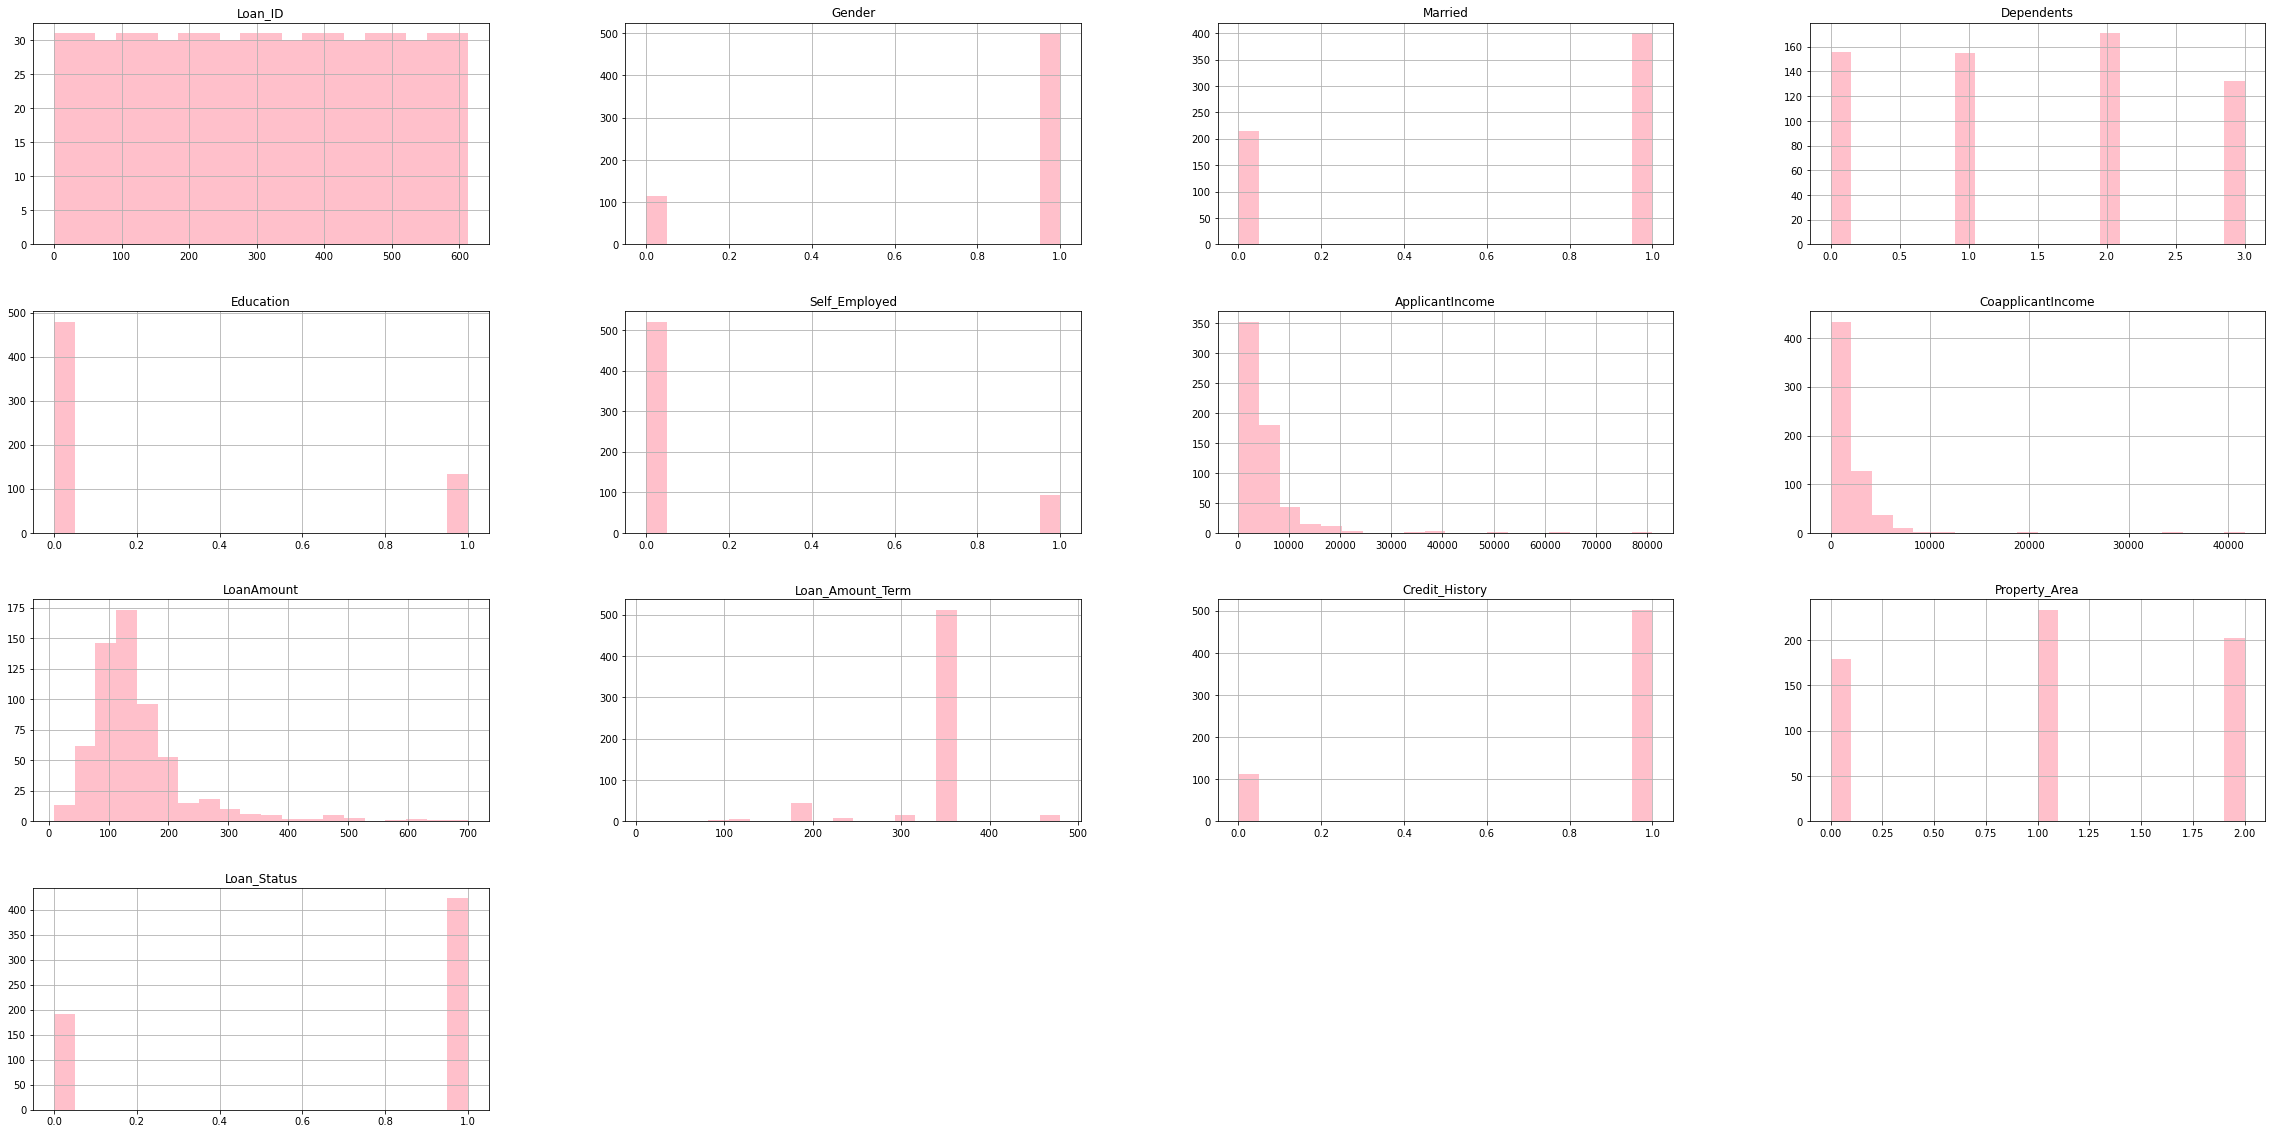

In [15]:
df.hist(bins=20,figsize=(40,20),color='pink')
plt.show()

### BOXPLOT

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

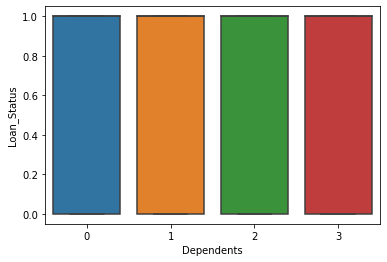

In [31]:
sns.boxplot(data=df,x="Dependents",y="Loan_Status")

### LINEPLOT

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

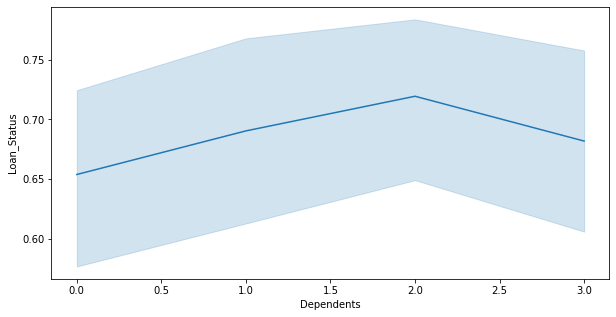

In [24]:

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Dependents', y='Loan_Status')

### COUNTPLOT

<AxesSubplot:xlabel='Gender', ylabel='count'>

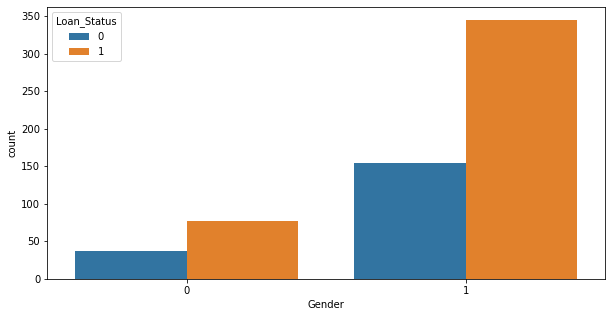

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Gender', hue='Loan_Status')

<AxesSubplot:xlabel='Education', ylabel='count'>

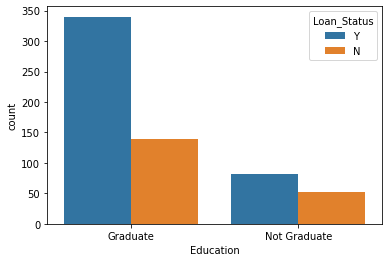

In [15]:

sns.countplot(x='Education',hue='Loan_Status',data=df)

### BARPLOT

<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

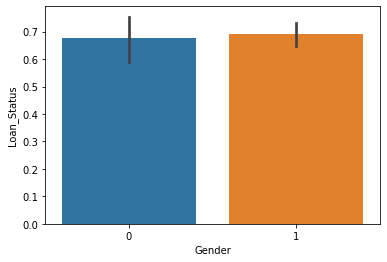

In [19]:
sns.barplot(df.Gender,df.Loan_Status)

### VISUALIZATION USING PAIRPLOT

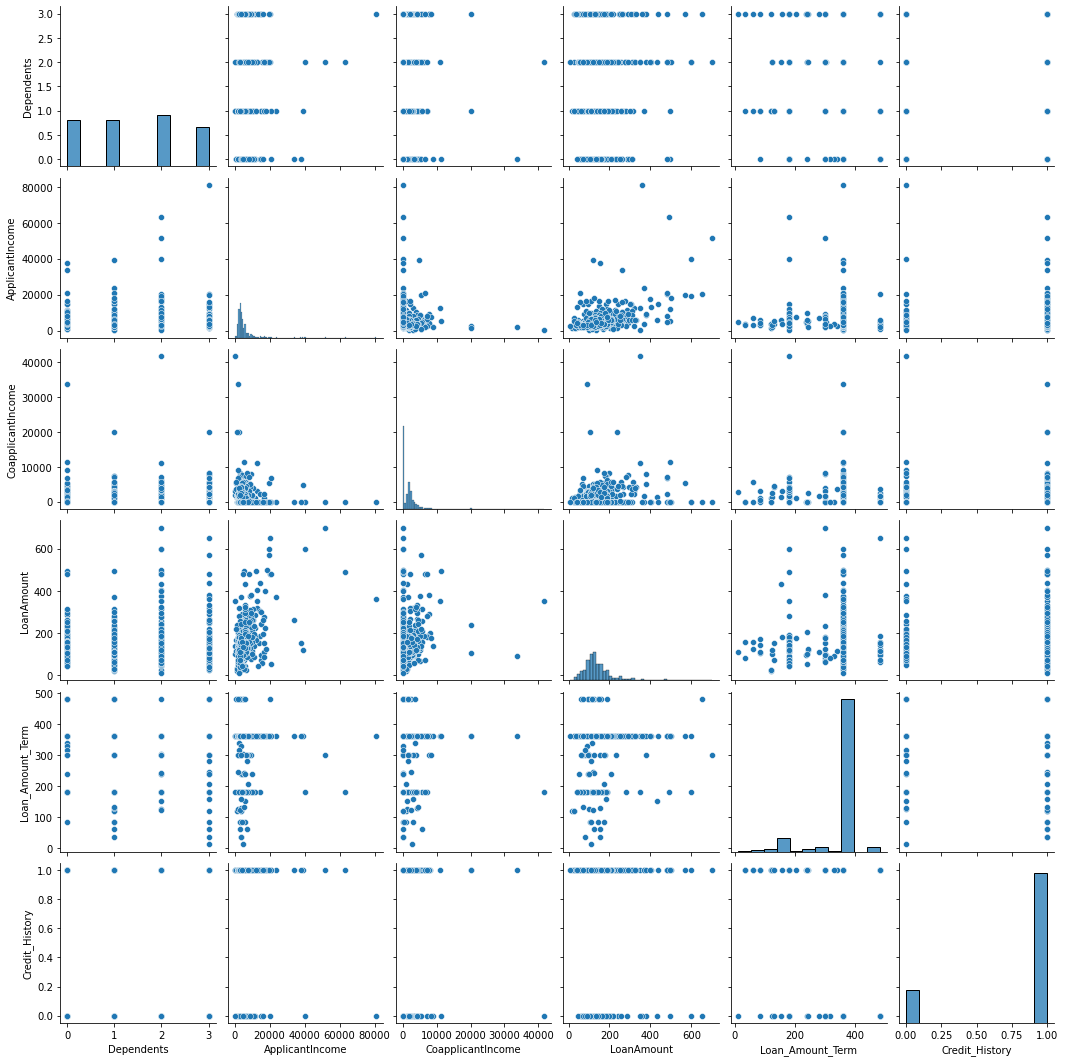

In [42]:
import seaborn as sns 
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

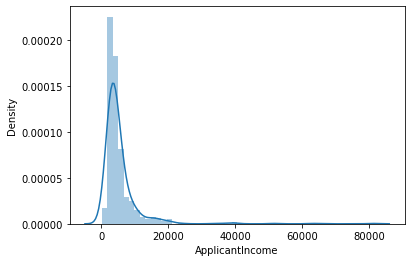

In [12]:
import seaborn as sns
sns.distplot(df["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

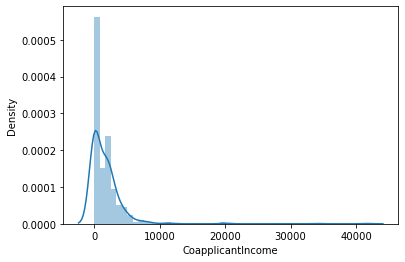

In [13]:
sns.distplot(df["CoapplicantIncome"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

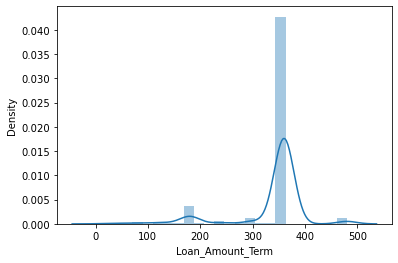

In [15]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

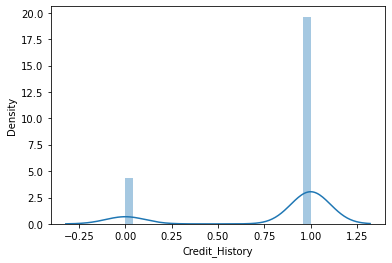

In [14]:
sns.distplot(df['Credit_History'])

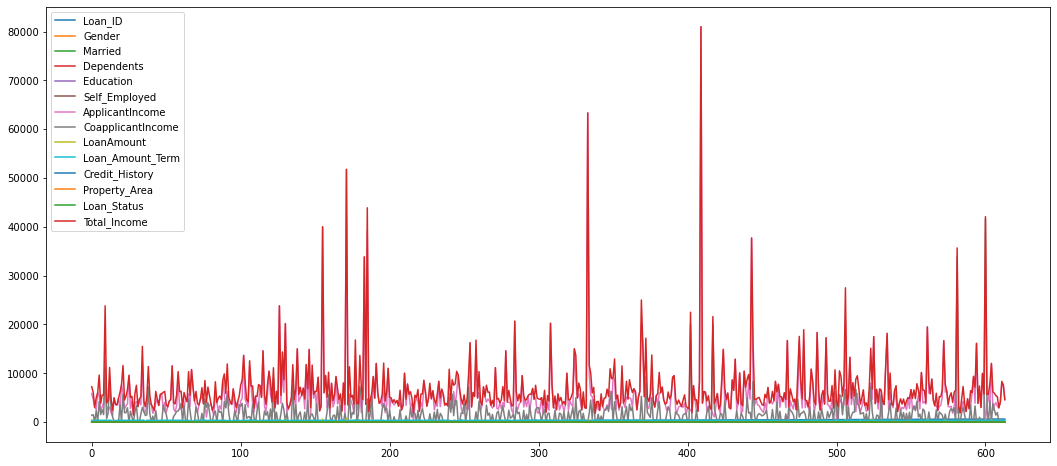

In [44]:
import matplotlib.pyplot as plt
df.plot(figsize=(18, 8))

plt.show()

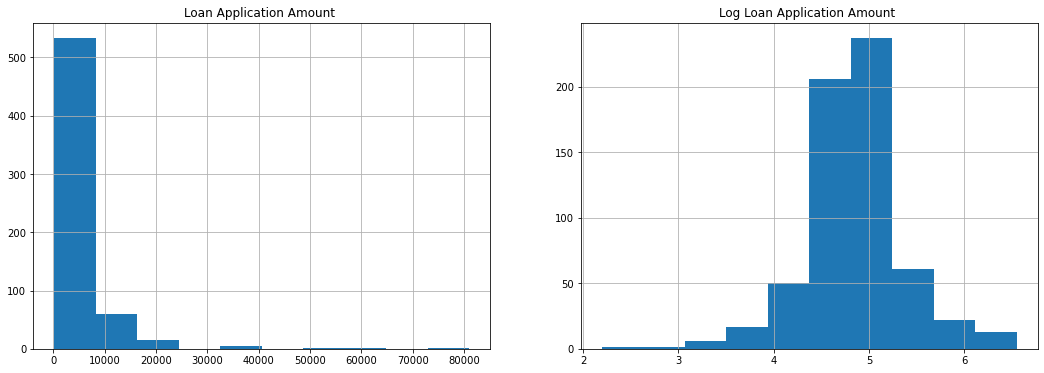

In [46]:
import numpy as np
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


df['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(df['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

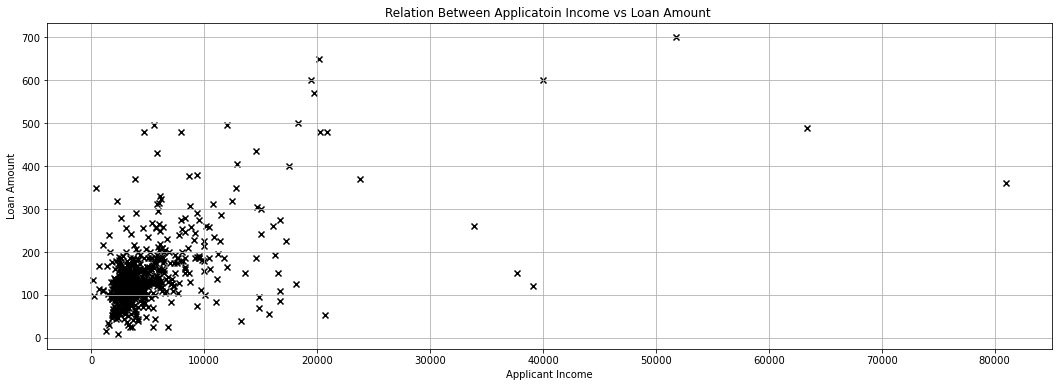

In [48]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(df['ApplicantIncome'] , df['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

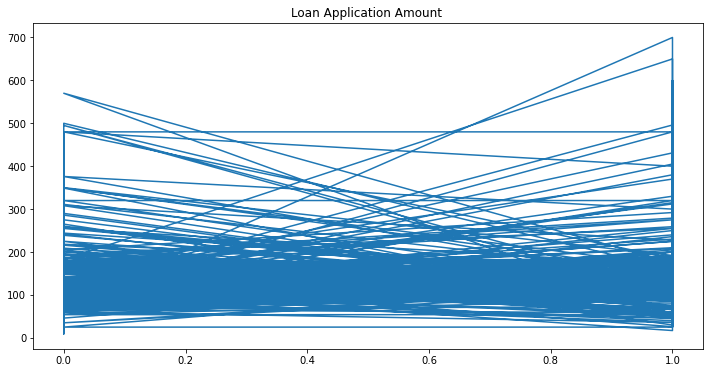

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(df['Loan_Status'], df['LoanAmount'])
plt.title("Loan Application Amount ")
plt.show()

### CORRELATION

In [36]:
corr=df.corr()
corr

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.041854,-0.010457,0.096552,-0.036338,0.015074
ApplicantIncome,0.041854,1.000000,-0.116577,0.539539,-0.034860,-0.005619
CoapplicantIncome,-0.010457,-0.116577,1.000000,0.184765,-0.064834,-0.052931
LoanAmount,0.096552,0.539539,0.184765,1.000000,0.034228,-0.033073
Loan_Amount_Term,-0.036338,-0.034860,-0.064834,0.034228,1.000000,0.061033
Credit_History,0.015074,-0.005619,-0.052931,-0.033073,0.061033,1.000000


<AxesSubplot:>

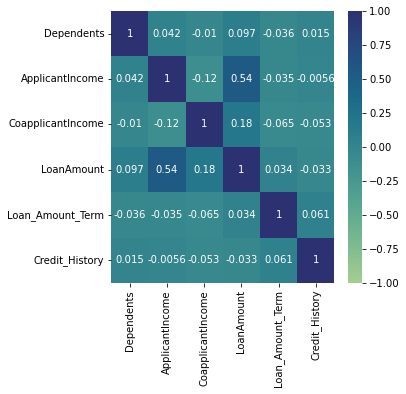

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, vmin=-1, cmap='crest')

<AxesSubplot:>

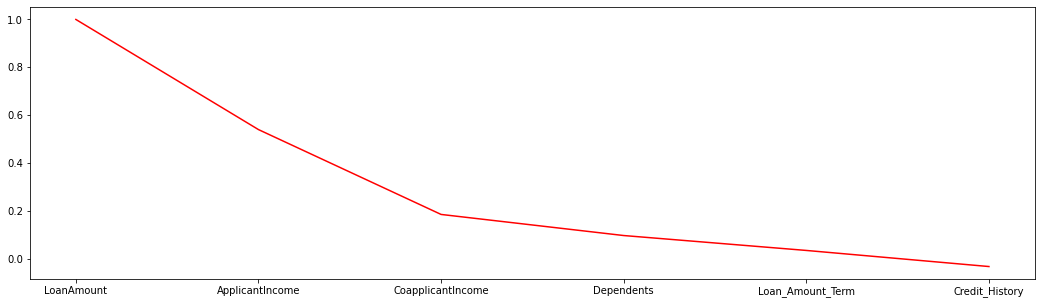

In [38]:
plt.figure(figsize=(18,5))
corr['LoanAmount'].sort_values(ascending=False).plot(color='r')

In [37]:
X=df.drop(['Loan_Status'],axis=1)
Y=df['Loan_Status']

### TESTING AND TRAINING THE MODEL

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=0)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(614, 13) (552, 13) (62, 13)


### USING SUPPORT VECTOR MACHINE TO PREDICT ACCURACY

In [41]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

In [42]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
y_pred=classifier.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8064516129032258

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[12,  7],
       [ 4, 39]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.85      0.91      0.88        43

    accuracy                           0.82        62
   macro avg       0.80      0.77      0.78        62
weighted avg       0.82      0.82      0.82        62



### TO PREDICT ACCURACY USING LOGISTIC REGRESSION

In [26]:
from sklearn.linear_model import LogisticRegression
data=LogisticRegression()
data.fit(X_train,Y_train)


LogisticRegression()

In [27]:
X_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
268,268,0,0,0,1,0,3418,0.0,135,360,1,0,3418.0
505,505,1,1,2,1,0,3510,4416.0,243,360,1,0,7926.0
337,337,1,1,0,1,1,2500,4600.0,176,360,1,0,7100.0
446,446,1,1,1,0,0,4652,0.0,110,360,1,0,4652.0
425,425,1,1,0,1,0,2666,4300.0,121,360,1,0,6966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,444,1,1,3,1,0,7333,8333.0,175,300,0,0,15666.0
316,316,1,1,2,1,0,3717,0.0,120,360,1,1,3717.0
280,280,1,0,2,0,1,4053,2426.0,158,360,0,2,6479.0
227,227,1,1,3,1,0,6250,1695.0,210,360,1,1,7945.0


In [28]:
proba=data.predict(X_test)
data.predict_proba(X_test)

array([[0.46843628, 0.53156372],
       [0.2893922 , 0.7106078 ],
       [0.38717736, 0.61282264],
       [0.32875043, 0.67124957],
       [0.35986956, 0.64013044],
       [0.56975702, 0.43024298],
       [0.28250558, 0.71749442],
       [0.18803763, 0.81196237],
       [0.32249557, 0.67750443],
       [0.15155065, 0.84844935],
       [0.33811454, 0.66188546],
       [0.06996138, 0.93003862],
       [0.59581113, 0.40418887],
       [0.21772754, 0.78227246],
       [0.67062533, 0.32937467],
       [0.31794423, 0.68205577],
       [0.08181562, 0.91818438],
       [0.75848872, 0.24151128],
       [0.17145431, 0.82854569],
       [0.2228814 , 0.7771186 ],
       [0.18676544, 0.81323456],
       [0.66574953, 0.33425047],
       [0.13924764, 0.86075236],
       [0.62784922, 0.37215078],
       [0.21170985, 0.78829015],
       [0.19263459, 0.80736541],
       [0.08428642, 0.91571358],
       [0.69231222, 0.30768778],
       [0.68767236, 0.31232764],
       [0.22318624, 0.77681376],
       [0.

In [62]:
y_pred=data.predict(X_test)
y_pred_train=data.predict(X_train)
print(y_pred)

[1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1]


In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
a=accuracy_score(Y_test,proba)
print(a)

0.8225806451612904


In [66]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,proba)
          

array([[11,  8],
       [ 3, 40]], dtype=int64)

In [30]:

print(classification_report(Y_test,proba))

              precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.85      0.91      0.88        43

    accuracy                           0.82        62
   macro avg       0.80      0.77      0.78        62
weighted avg       0.82      0.82      0.82        62



### HYPERPARAMETER TUNING

In [ ]:
This is used to imporve the accuracy performance

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
# Instantiating logistic regression classifier
logreg = LogisticRegression()
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
logreg_cv.fit(X, Y)
print("Best score is {}".format(logreg_cv.best_score_))

Best score is 0.9739999999999999


### DISPLAYING TRUE AND FALSE POSITIVE RATE

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_proba=model.predict_proba(X_test)
y_predicted=y_proba[:,1]
print(y_predicted)


[0.8 0.5 0.5 0.9 0.9 0.4 0.7 0.9 0.8 0.7 0.7 0.4 0.7 0.9 0.3 1.  0.7 0.3
 0.9 0.9 0.6 0.2 0.8 0.3 0.9 0.9 0.9 0.3 0.1 1.  0.7 0.2 0.8 0.9 1.  0.2
 0.4 0.4 0.3 0.2 1.  0.8 0.7 0.9 0.9 0.9 0.8 0.4 0.8 0.8 0.4 0.9 0.9 0.7
 0.9 0.9 0.6 0.1 1.  0.5 0.7 1. ]


In [56]:
fpr,tpr,thresholds=roc_curve(Y_test,y_predicted)

In [57]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.8623011015911872


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

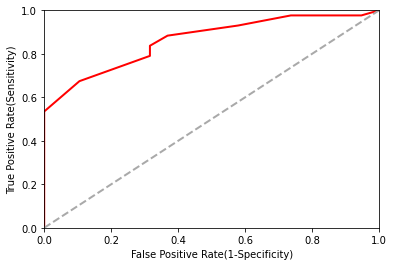

In [58]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='r',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')



### PREDICTION FOR A MODEL

In [34]:
Y=data.predict([[26,1,0,3,1,0,7920,8346,540,470,1,3,8000]])
if(Y==1):
    print("LOAN APPROVED FOR A PERSON")
else:
    print("LOAN REJECTED FOR A PERSON")

LOAN APPROVED FOR A PERSON


### FOR THIS PREDICTION I USED SVM AND LOGISTIC REGRESSION BY USING SVM IT GIVES ACCURACY OF 80% FOR LOGISTIC REGRESSION IT GIVES 82% SO I USED HYPER PARAMETER TUNING FOR LOGISTIC REGRESSION TO IMPROVE ACCURACY AND SET DATA TO BE FIT.IT GIVES A ACCURACY OF 97%.SO LOGISTIC REGRESSION IS THE BEST MODEL FOR ANALYSING LOAN STATUS PREDICTION